In [47]:
from mpl_toolkits import mplot3d

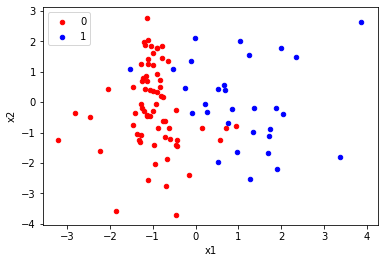

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import pandas as pd
eps = np.finfo(float).eps
from pandas import DataFrame

X, y = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_informative=2, random_state = 0, weights=[0.7, 0.3])
# scatter plot, dots colored by class value
d = {'x1':X[:,0], 'x2':X[:,1], 'y':y}
df = DataFrame(data = d)
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
plt.show()

In [64]:
def training_error(data, split1, split2, feature1, feature2):
    d1 = data[(data[feature1] > split1) & (data[feature2] > split2)]
    d2 = data[(data[feature1] <= split1) & (data[feature2] <= split2)]
    d3 = data[(data[feature1] > split1) & (data[feature2] <= split2)]
    d4 = data[(data[feature1] <= split1) & (data[feature2] > split2)]
    v1 = len(d1[d1['y'] == 0])/(len(d1['y'])+eps)
    v2 = len(d2[d2['y'] == 0])/(len(d2['y'])+eps)
    v3 = len(d3[d3['y'] == 0])/(len(d3['y'])+eps)
    v4 = len(d4[d4['y'] == 0])/(len(d4['y'])+eps)
    if v1>0.5:
        a = (1-v1)*(1-v1)
    else:
        a = v1*v1
    if v2>0.5:
        b = (1-v2)*(1-v2)
    else:
        b = v2*v2
    if v3>0.5:
        c = (1-v3)*(1-v3)
    else:
        c = v3*v3
    if v4>0.5:
        d = (1-v4)*(1-v4)
    else:
        d = v4*v4
        
    return a+b+c+d

In [65]:
l = []
l1 = []
for i in range(-3, 4):
    for j in range(-3, 4):
        l.append([i, j, training_error(df, i, j, 'x1', 'x2')])
print(l)

[[-3, -3, 0.09565309809756617], [-3, -2, 0.15717455621301776], [-3, -1, 0.17175336247683498], [-3, 0, 0.18355636941093367], [-3, 1, 0.21902500000000003], [-3, 2, 0.24250339520144865], [-3, 3, 0.09182736455463725], [-2, -3, 0.10405827263267432], [-2, -2, 0.16608039371119043], [-2, -1, 0.18635918367346943], [-2, 0, 0.19868857712777768], [-2, 1, 0.2281076423328705], [-2, 2, 0.25000000000000006], [-2, 3, 0.09972299168975068], [-1, -3, 0.2061873175281142], [-1, -2, 0.3214519644751292], [-1, -1, 0.36583927349192147], [-1, 0, 0.40648453371370596], [-1, 1, 0.4065234567901235], [-1, 2, 0.1767767543947659], [-1, 3, 0.19986958096848206], [0, -3, 0.02775510204081633], [0, -2, 0.0319331018631718], [0, -1, 0.05094094873620505], [0, 0, 0.06113862345522579], [0, 1, 0.07599107063578342], [0, 2, 0.14003074785392658], [0, 3, 0.027352607709750572], [1, -3, 0.03266076353607201], [1, -2, 0.03605191475725045], [1, -1, 0.05084445777086472], [1, 0, 0.06650331243753518], [1, 1, 0.07209910741766695], [1, 2, 0.14

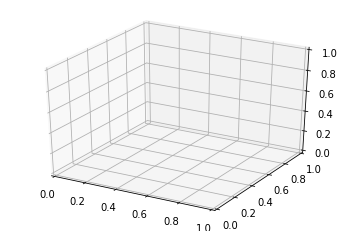

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [67]:
x = []
y = []
z = []
for i, j, k in l:
    x.append(i)
    y.append(j)
    z.append(k)

In [68]:
ax.scatter3D(x, y, z, c=z, cmap='Greens');

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [69]:
print(len(x),y,z)

49 [-3, -2, -1, 0, 1, 2, 3, -3, -2, -1, 0, 1, 2, 3, -3, -2, -1, 0, 1, 2, 3, -3, -2, -1, 0, 1, 2, 3, -3, -2, -1, 0, 1, 2, 3, -3, -2, -1, 0, 1, 2, 3, -3, -2, -1, 0, 1, 2, 3] [0.09565309809756617, 0.15717455621301776, 0.17175336247683498, 0.18355636941093367, 0.21902500000000003, 0.24250339520144865, 0.09182736455463725, 0.10405827263267432, 0.16608039371119043, 0.18635918367346943, 0.19868857712777768, 0.2281076423328705, 0.25000000000000006, 0.09972299168975068, 0.2061873175281142, 0.3214519644751292, 0.36583927349192147, 0.40648453371370596, 0.4065234567901235, 0.1767767543947659, 0.19986958096848206, 0.02775510204081633, 0.0319331018631718, 0.05094094873620505, 0.06113862345522579, 0.07599107063578342, 0.14003074785392658, 0.027352607709750572, 0.03266076353607201, 0.03605191475725045, 0.05084445777086472, 0.06650331243753518, 0.07209910741766695, 0.14026042699451388, 0.03114186851211074, 0.07650520597555452, 0.13688016528925617, 0.13488709093104695, 0.14636112900133236, 0.16716370156

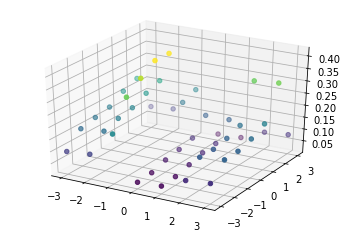

In [71]:
ax = plt.axes(projection='3d')

zdata = np.array(z)
xdata = np.array(x)
ydata = np.array(y)
ax.scatter3D(xdata, ydata, zdata, c=z);